Ch12 Q02 p.552

a)

<ipython-input-6-4b207f387d68>:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dissimilarity_matrix, method='complete')


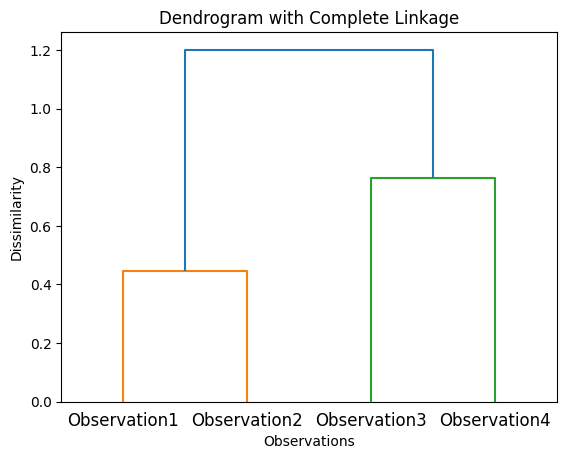

In [6]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
dissimilarity_matrix = np.array([[0, 0.3, 0.4, 0.7],
                                 [0.3, 0, 0.5, 0.8],
                                 [0.4, 0.5, 0, 0.45],
                                 [0.7, 0.8, 0.45, 0]])

linkage_matrix = linkage(dissimilarity_matrix, method='complete')

dendrogram(linkage_matrix, labels=["Observation1", "Observation2", "Observation3", "Observation4"])
plt.xlabel("Observations")
plt.ylabel("Dissimilarity")
plt.title("Dendrogram with Complete Linkage")
plt.show()

b)

<ipython-input-7-2ae421a87558>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dissimilarity_matrix, method='single')


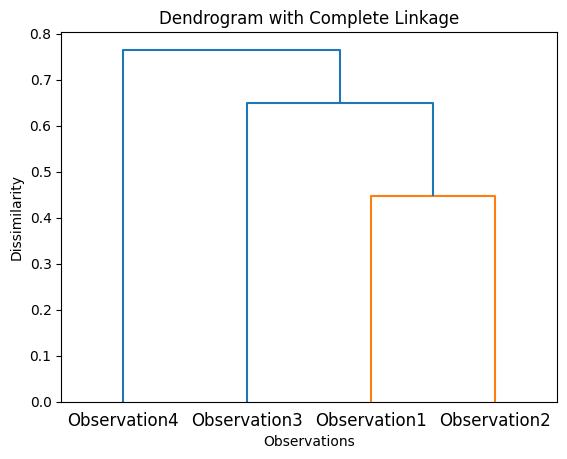

In [7]:
linkage_matrix = linkage(dissimilarity_matrix, method='single')
dendrogram(linkage_matrix, labels=["Observation1", "Observation2", "Observation3", "Observation4"])
plt.xlabel("Observations")
plt.ylabel("Dissimilarity")
plt.title("Dendrogram with Complete Linkage")
plt.show()

c)

Cluster 1 = (Observation 1, Observation 2)

Cluster 2 = (Observation 3, Observation 4)


d)

Cluster 1 = (Observation 4)

Cluster 2 = (Observation 3, Observation 1, Observation 2)

e)

<ipython-input-10-6e9d42c7b3f7>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dissimilarity_matrix, method='complete')


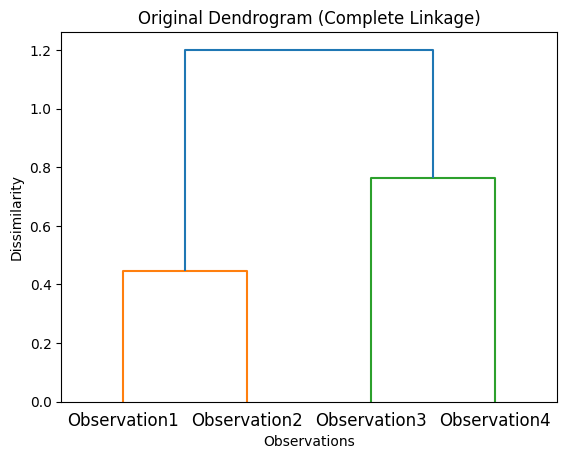

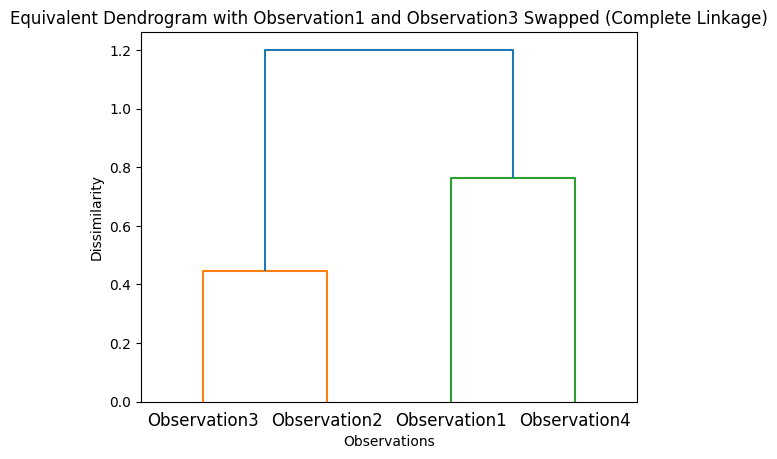

In [10]:
# Perform hierarchical clustering with complete linkage
linkage_matrix = linkage(dissimilarity_matrix, method='complete')

# Plot the original dendrogram
dendrogram(linkage_matrix, labels=["Observation1", "Observation2", "Observation3", "Observation4"])
plt.xlabel("Observations")
plt.ylabel("Dissimilarity")
plt.title("Original Dendrogram (Complete Linkage)")
plt.show()

# Rearrange the positions of Observation1 and Observation3
# Create an equivalent dendrogram
rearranged_labels = ["Observation3", "Observation2", "Observation1", "Observation4"]

# Plot the equivalent dendrogram
plt.figure()
dendrogram(linkage_matrix, labels=rearranged_labels)
plt.xlabel("Observations")
plt.ylabel("Dissimilarity")
plt.title("Equivalent Dendrogram with Observation1 and Observation3 Swapped (Complete Linkage)")
plt.show()


Ch12 Q03 p.553

a)

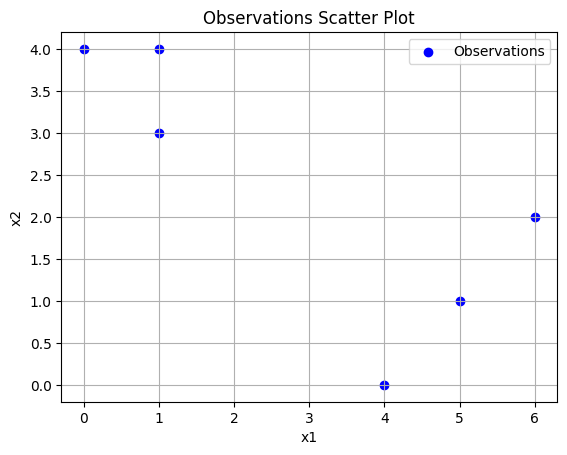

In [31]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.array([1, 1, 0, 5, 6, 4])
x2 = np.array([4, 3, 4, 1, 2, 0])

# Create a scatter plot
plt.scatter(x1, x2, c='blue', marker='o', label='Observations')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Observations Scatter Plot')

# Show the plot
plt.legend()
plt.grid(True)
plt.show()

b)

In [37]:
# Number of clusters (K = 2)
K = 2

# Randomly assign cluster labels
cluster_labels = np.random.choice(K, len(x1))

# Report the cluster labels for each observation
for i in range(len(x1)):
    print(f'Observation {i+1} belongs to Cluster {cluster_labels[i]}')

Observation 1 belongs to Cluster 1
Observation 2 belongs to Cluster 1
Observation 3 belongs to Cluster 1
Observation 4 belongs to Cluster 0
Observation 5 belongs to Cluster 1
Observation 6 belongs to Cluster 0


c)

In [38]:
# Number of clusters
# K = 2

# Initialize arrays to store the centroids
centroids = np.zeros((K, 2))

# Compute centroids for each cluster
for k in range(K):
    # Select observations that belong to cluster k
    cluster_k_indices = np.where(cluster_labels == k)

    # Calculate the mean of the selected observations to get the centroid
    centroids[k] = np.mean(np.array([x1[cluster_k_indices], x2[cluster_k_indices]]), axis=1)

# Print the computed centroids for each cluster
for k in range(K):
    print(f'Centroid for Cluster {k}: ({centroids[k][0]}, {centroids[k][1]})')

Centroid for Cluster 0: (4.5, 0.5)
Centroid for Cluster 1: (2.0, 3.25)


d)

In [40]:
# Initialize an array to store the updated cluster labels
updated_cluster_labels = np.zeros(len(x1), dtype=int)

# Assign each observation to the nearest centroid
for i in range(len(x1)):
    distances = np.sqrt((x1[i] - centroids[:, 0]) ** 2 + (x2[i] - centroids[:, 1]) ** 2)
    updated_cluster_labels[i] = np.argmin(distances)

# Report the updated cluster labels for each observation
for i in range(len(x1)):
    print(f'Observation {i+1} now belongs to Cluster {updated_cluster_labels[i]}')

Observation 1 now belongs to Cluster 1
Observation 2 now belongs to Cluster 1
Observation 3 now belongs to Cluster 1
Observation 4 now belongs to Cluster 0
Observation 5 now belongs to Cluster 0
Observation 6 now belongs to Cluster 0


e)

In [41]:
# Initialize a variable to keep track of iterations
iteration = 0

# Maximum number of iterations (to avoid infinite loops)
max_iterations = 100

# Repeat steps (c) and (d) until convergence
converged = False
while not converged and iteration < max_iterations:
    # Print cluster labels for the current iteration
    print(f'Iteration {iteration}: Cluster Labels - {cluster_labels}')

    # (c) Compute centroids for each cluster
    for k in range(K):
        # Select observations that belong to cluster k
        cluster_k_indices = np.where(cluster_labels == k)

        # Calculate the mean of the selected observations to get the centroid
        centroids[k] = np.mean(np.array([x1[cluster_k_indices], x2[cluster_k_indices]]), axis=1)

    # (d) Assign each observation to the nearest centroid
    updated_cluster_labels = np.argmin(
        np.sqrt((x1[:, np.newaxis] - centroids[:, 0])**2 + (x2[:, np.newaxis] - centroids[:, 1])**2),
        axis=1
    )

    # Check for convergence by comparing new cluster labels with the previous ones
    if np.array_equal(updated_cluster_labels, cluster_labels):
        converged = True
    else:
        cluster_labels = updated_cluster_labels

    # Increment the iteration counter
    iteration += 1

# Print the final cluster assignments
print(f'Final Cluster Labels - {cluster_labels}')


Iteration 0: Cluster Labels - [1 1 1 0 1 0]
Iteration 1: Cluster Labels - [1 1 1 0 0 0]
Final Cluster Labels - [1 1 1 0 0 0]


f)

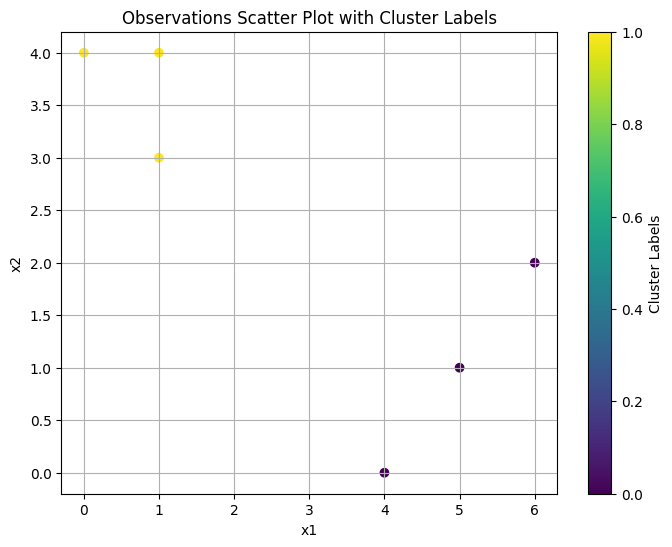

In [42]:
# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c=cluster_labels, cmap='viridis', marker='o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Observations Scatter Plot with Cluster Labels')
plt.colorbar(label='Cluster Labels')

# Show the plot
plt.grid(True)
plt.show()